# 다중 분류 문제 해결하기

### 2. 상관도 그래프

In [3]:
import pandas as pd

# 아이리스 데이터를 불러옵니다.
df = pd.read_csv('./data/iris3.csv')

In [4]:
# 첫 5줄을 봅니다.
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

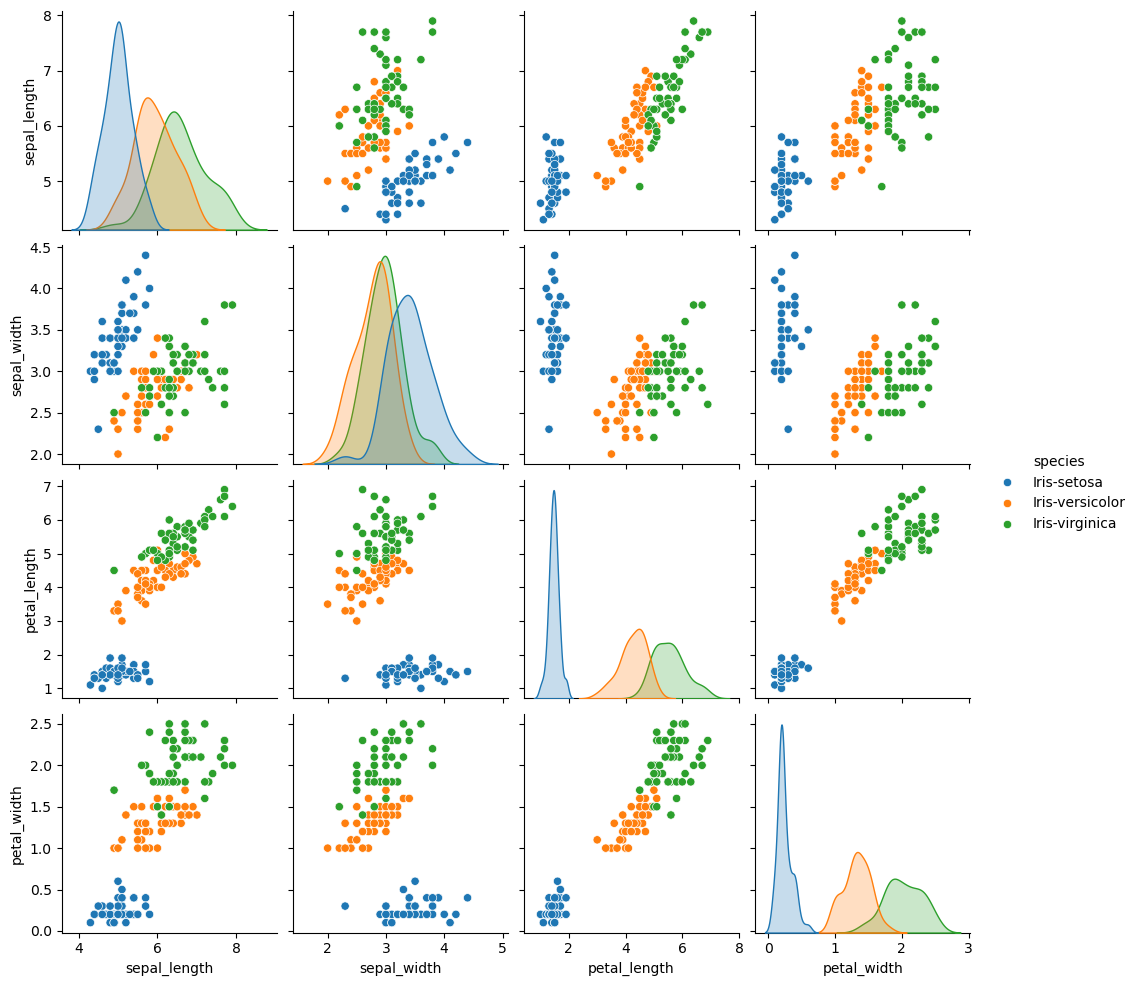

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프로 확인해 봅시다.
sns.pairplot(df, hue='species');
plt.show()

## 3. 원-핫 인코딩

In [7]:
# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

# X와 y의 첫 5줄을 출력해 보겠습니다.
print(X[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [8]:
# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y)

# 원-핫 인코딩 결과를 확인합니다.
print(y[0:5])

   Iris-setosa  Iris-versicolor  Iris-virginica
0         True            False           False
1         True            False           False
2         True            False           False
3         True            False           False
4         True            False           False


## 4. 소프트맥스

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history=model.fit(X, y, epochs=30, batch_size=5)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6916 - loss: 1.2516   
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6927 - loss: 0.9105 
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6811 - loss: 0.8089 
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8087 - loss: 0.7232 
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8643 - loss: 0.6775 
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8260 - loss: 0.6177 
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8667 - loss: 0.5825 
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8007 - loss: 0.5109 
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9269 - loss: 0.5191 
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8839 - loss: 0.4657 
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8958 - loss: 0.4597 
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

## 5. 아이리스 품족 예측 실행

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 아이리스 데이터를 불러옵니다.
df = pd.read_csv('./data/iris3.csv')

# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y)

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history=model.fit(X, y, epochs=30, batch_size=5)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 12)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3210 - loss: 1.0302   
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5959 - loss: 0.8017 
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7981 - loss: 0.7016 
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8772 - loss: 0.6490 
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7736 - loss: 0.6004 
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8478 - loss: 0.5393 
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8345 - loss: 0.5306 
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8327 - loss: 0.4892 
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9069 - loss: 0.4653 
Epoch 10/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9652 - loss: 0.4419 
Epoch 11/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9193 - loss: 0.4184 
Epoch 12/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

In [13]:
score=model.evaluate(X, y)
print('Test accuracy:', score[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9790 - loss: 0.1594  
Test accuracy: 0.9733333587646484


In [14]:
print('Test loss', score[0])

Test loss 0.22447362542152405
